In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 AnalisisFraudes.ipynb	'Copy of AnalisisFraudes.ipynb'   merchant_category.csv   transaction.csv
 card_holder.csv	 credit_card.csv		  merchant.csv


# Análisis Archivo Transacciones

In [ ]:
TXs = pd.read_csv('/content/drive/My Drive/Colab Notebooks/transaction.csv')

# Formato de fecha
TXs['date'] = pd.to_datetime(TXs['date'])

Txs.head()

,id,date,amount,card,id_merchant
0,222,2018-01-01 21:35:10,6.22,3561954487988605,69
1,2045,2018-01-01 21:43:12,3.83,5135837688671496,85
2,395,2018-01-01 22:41:21,9.61,213193946980303,82
3,3309,2018-01-01 23:13:30,19.03,4263694062533017,5
4,567,2018-01-01 23:15:10,2.95,4498002758300,64


In [ ]:
# Txs realizadas entre las 6:00 y 8:00 a.m.
Tx_Temprano = TXs[(TXs['date'].dt.hour >= 6) & (TXs['date'].dt.hour < 8)]

# Resumen Estadístico de Txs
Tx_Temprano.describe().round(2)

,id,date,amount,card,id_merchant
count,301.00,301,301.00,3.010000e+02,301.00
mean,1785.94,2018-06-28 02:28:33.358803968,54.44,8.828798e+17,75.08
min,25.00,2018-01-04 06:34:37,0.56,5.018092e+11,1.00
25%,987.00,2018-03-31 06:08:07,3.61,3.018196e+13,40.00
50%,1770.00,2018-06-24 07:28:48,10.37,4.027907e+15,71.00
75%,2646.00,2018-09-26 07:52:23,14.94,5.500708e+15,112.00
max,3499.00,2018-12-28 07:02:38,2001.00,4.962915e+18,150.00
std,963.82,NaN,255.02,1.827833e+18,42.17


In [ ]:
# Txs Monto < $2.00
Tx_Bajo_Monto = TXs[TXs['amount'] < 2.00]

# Resumen estadístico Txs
Tx_Bajo_Monto.describe().round(2)

,id,date,amount,card,id_merchant
count,350.00,350,350.00,3.500000e+02,350.00
mean,1752.46,2018-06-29 02:02:47.200000,1.43,7.822756e+17,76.59
min,10.00,2018-01-02 02:06:21,0.51,5.018092e+11,2.00
25%,715.75,2018-04-01 04:19:51,1.19,3.007830e+13,39.00
50%,1997.00,2018-06-23 03:36:57.500000,1.48,3.561514e+15,76.00
75%,2368.75,2018-10-01 02:17:15.249999872,1.72,5.266877e+15,116.00
max,3498.00,2018-12-30 10:36:22,1.99,4.962915e+18,150.00
std,1083.76,NaN,0.36,1.738212e+18,43.88


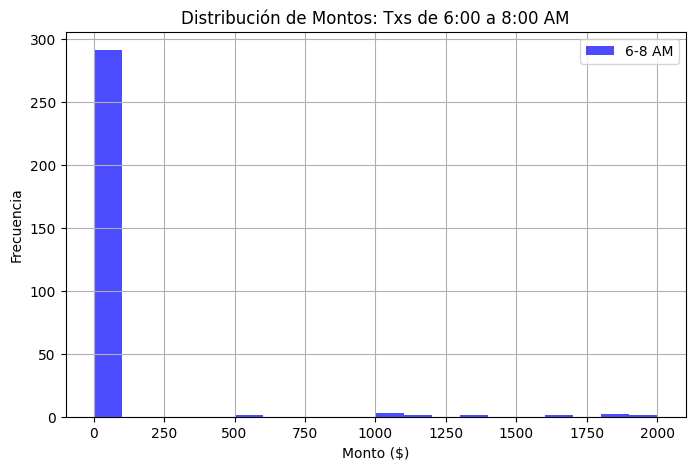

In [ ]:
# Grafiquemos la distribución de montos Tx de 6:00 a 8:00 a.m.
plt.figure(figsize=(8, 5))
plt.hist(Tx_Temprano['amount'], bins=20, alpha=0.7, color='blue', label='6-8 AM')
plt.title('Distribución de Montos: Txs de 6:00 a 8:00 AM')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

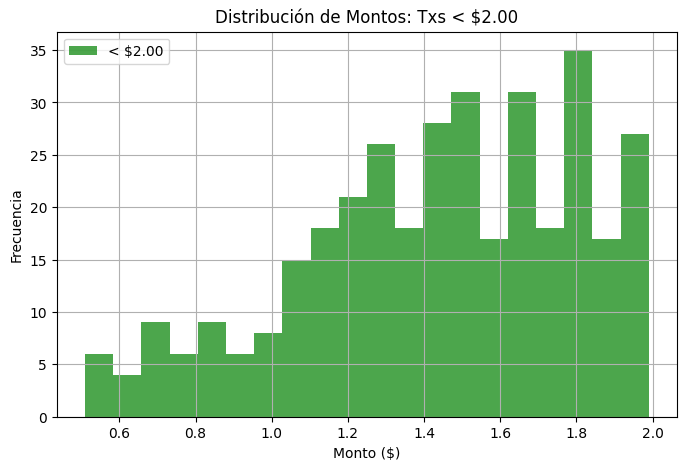

In [ ]:
# Graficaquemos  distribución de montos para Tx de Bajo Monto
plt.figure(figsize=(8, 5))
plt.hist(Tx_Bajo_Monto['amount'], bins=20, alpha=0.7, color='green', label='< $2.00')
plt.title('Distribución de Montos: Txs < $2.00')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Conclusiones del Análisis
1. Las TXs entre las 6:00 y 8:00 a.m. incluyen montos altos. Este patrón puede ser indicativo de actividad sospechosa.
2. Las TXs de Bajo Monto < $2.00 son frecuentes y deben ser monitoreadas como posible intento de fraude por la cantidad.
3. Los gráficos muestran patrones claros que justifican una revisión más profunda de estas Txs.

# Análisis Relación de TXs con Titulares de TArjeta

*   Frecuencia de TXs por titular de tarjeta.
*   Identificación de titulares con patrones sospechosos (como múltiples TXs de bajo monto).

In [ ]:
print(TX_Titulares.columns)
print(TXs.columns)

Index(['id', 'name'], dtype='object')
Index(['id', 'date', 'amount', 'card', 'id_merchant'], dtype='object')


In [ ]:
TX_Titulares = pd.read_csv('/content/drive/My Drive/Colab Notebooks/card_holder.csv')

# Relacionar Txs con titulares
Tx_Con_Titulares = TXs.merge(TX_Titulares, left_on='id', right_on='id')

# Contar TXs por titular
Num_TXs_Titular = Tx_Con_Titulares.groupby('id')['amount'].count().reset_index()
Num_TXs_Titular.columns = ['id', 'Transaction_Count']

print(Tx_Con_Titulares.head())

   id                date  amount                 card  id_merchant  \
0  13 2018-02-02 21:41:12    4.29     6500236164848279          148   
1  11 2018-02-04 04:00:18    6.90     6500236164848279          125   
2  22 2018-02-21 17:59:47    3.80     4268491956169254          120   
3  17 2018-02-27 05:09:28    6.35  4644008655884311378            2   
4   5 2018-02-27 09:20:29    6.03     4150721559116778           18   

              name  
0      John Martin  
1   Brandon Pineda  
2   Austin Johnson  
3  Michael Carroll  
4      Sara Cooper  


In [ ]:
# Filtrar titulares con más de 10 TXs bajo monto
Titulares_Bajo_Monto = Tx_Con_Titulares[Tx_Con_Titulares['amount'] < 2.00].groupby('id')['amount'].count()
Titulares_Bajo_Monto = Titulares_Bajo_Monto[Titulares_Bajo_Monto >= 10]


print(Titulares_Bajo_Monto)

Series([], Name: amount, dtype: int64)


# No existen titulares con más de 10 TXs bajo monto

# Analicemos El comercio con Más TXs Bajo monto

In [ ]:
TX_Comercio = pd.read_csv('/content/drive/My Drive/Colab Notebooks/merchant.csv')
Categ_Comercio = pd.read_csv('/content/drive/My Drive/Colab Notebooks/merchant_category.csv')

print(TX_Comercio.head())
print(Categ_Comercio.head())

   id                          name  id_merchant_category
0   1      Murphy, Heath and Fields                     1
1   2                   Riggs-Adams                     1
2   3  Sanders, Parks and Mcfarland                     2
3   4                Mccarty-Thomas                     3
4   5                Miller-Blevins                     4
   id         name
0   1   restaurant
1   2  coffee shop
2   3          bar
3   4          pub
4   5   food truck


In [ ]:
Tx_Con_Comercio = TXs.merge(TX_Comercio, left_on='id', right_on='id', suffixes=('_id', '_id'))

# Relacionar con categorías de comercios
Tx_Comercio_Categoria = Tx_Con_Comercio.merge(Categ_Comercio, left_on='id_merchant_category', right_on='id', suffixes=('_id', '_id'))

# Verificar las primeras filas del DataFrame resultante
print(Tx_Comercio_Categoria.head())

   id_id                date   amount                 card  id_merchant  \
0     99 2018-01-02 23:27:46  1031.00         501879657465           95   
1    139 2018-01-04 11:15:55     5.72     3535651398328201           99   
2     77 2018-01-05 16:58:08     4.57     5135837688671496           91   
3    149 2018-01-07 16:50:22     5.83  4159836738768855913           81   
4     30 2018-01-17 09:09:33     3.82     4711773125020499          111   

                    name_id  id_merchant_category  id_id     name_id  
0    Bond, Lewis and Rangel                     1      1  restaurant  
1                Kidd-Lopez                     5      5  food truck  
2  Brown, Ballard and Glass                     1      1  restaurant  
3            Clark and Sons                     5      5  food truck  
4              Atkinson Ltd                     3      3         bar  


In [ ]:
print(Tx_Comercio_Categoria.columns)

Index(['id_id', 'date', 'amount', 'card', 'id_merchant', 'name_id',
       'id_merchant_category', 'id_id', 'name_id'],
      dtype='object')


In [ ]:
Bajo_Monto_Comercios = Tx_Comercio_Categoria[Tx_Comercio_Categoria['amount'] < 2.00]

# Contar TXs por comercio
Conteo_Bajo_Monto = Bajo_Monto_Comercios.groupby('id_merchant')['amount'].count().reset_index()
Conteo_Bajo_Monto.columns = ['Merchant_ID', 'Transaction_Count']

# RElacionar el nomrbe
Conteo_Bajo_Monto = Conteo_Bajo_Monto.merge(TX_Comercio, left_on='Merchant_ID', right_on='id', suffixes=('', '_y'))

# Ordenar por la cantidad de TXs
Top_Comercios_Bajo_Monto = Conteo_Bajo_Monto.sort_values(by='Transaction_Count', ascending=False)

# Mostrar el comercio con más TXs de bajo monto
print(Top_Comercios_Bajo_Monto[['name', 'Transaction_Count']].head())

                       name  Transaction_Count
0             Romero-Jordan                  1
1  Allen, Ramos and Carroll                  1


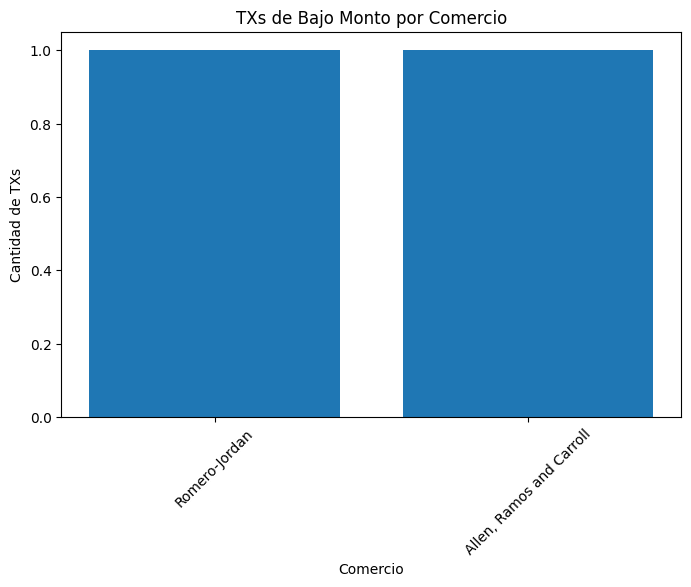

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(Top_Comercios_Bajo_Monto['name'], Top_Comercios_Bajo_Monto['Transaction_Count'])
plt.title('TXs de Bajo Monto por Comercio')
plt.xlabel('Comercio')
plt.ylabel('Cantidad de TXs')
plt.xticks(rotation=45)
plt.show()